In [39]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [40]:
folder = ""

In [41]:
im = Image.open(folder + "cat-7.jpg")


In [42]:
eye_s_1 = np.array([95, 120])
eye_s_2 = np.array([178, 112])

In [65]:
eye_d_1 = np.array([44, 64])
eye_d_2 = np.array([184, 64])

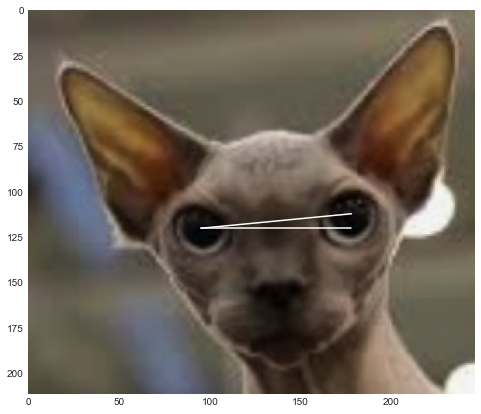

In [66]:
plt.style.use("seaborn-dark")
plt.figure(figsize=(8, 8))
plt.imshow(im)
plt.plot([eye_s_1[0], eye_s_2[0]], [eye_s_1[1], eye_s_2[1]], c='white')
plt.plot([eye_s_1[0], eye_s_2[0]], [eye_s_1[1], eye_s_1[1]], c='white')
plt.show()

In [67]:
a_s = np.arctan2(*np.roll(eye_s_2 - eye_s_1, 1))
a_s

-0.0960887155173669

In [68]:
a_d = np.arctan2(*np.roll(eye_d_2 - eye_d_1, 1))
a_d

0.0

In [69]:
scale = np.linalg.norm(eye_d_1 - eye_d_2) / np.linalg.norm(eye_s_1 - eye_s_2)
scale

1.6789660752484488

In [70]:
cs = (eye_s_1 + eye_s_2) / 2
cd = (eye_d_1 + eye_d_2) / 2

In [71]:
an = a_d - a_s
sR = scale * np.array([[np.cos(an), -np.sin(an)],
                     [np.sin(an), np.cos(an)]])
A = np.hstack([sR, np.array([cd - sR.dot(cs)]).T])
A

array([[   1.67122106,   -0.16108155,  -95.43621458],
       [   0.16108155,    1.67122106, -151.84927369]])

In [72]:
Hd, Wd = (328, 328)
dest_arr = (100*np.ones((Hd, Wd, 3))).astype('uint8') 

In [73]:
sour_arr = np.array(im)
sour_arr.shape

(212, 246, 3)

In [74]:
H, W, _ = sour_arr.shape

for j in range(H):
    for i in range(W):
        v = np.array([i,j,1])
        i_d, j_d = A.dot(v).astype(int)
        if (0 <= j_d < Hd) and (0 <= i_d < Wd):
            dest_arr[j_d, i_d] = sour_arr[j, i]

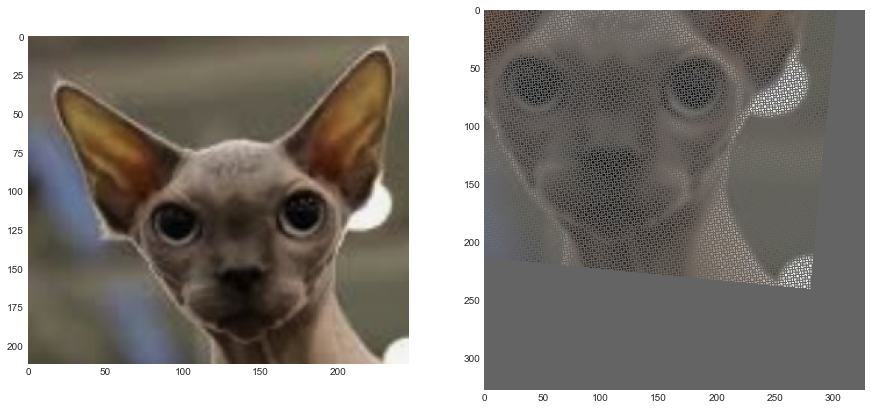

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].imshow(im)
axs[1].imshow(dest_arr)
plt.show()

In [76]:
A1 = np.linalg.inv(np.vstack([A, [0,0,1]]))
A1

array([[ 5.92857143e-01,  5.71428571e-02,  6.52571429e+01],
       [-5.71428571e-02,  5.92857143e-01,  8.45714286e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [77]:
coeffs = A1[:-1].reshape(-1)
coeffs

array([ 5.92857143e-01,  5.71428571e-02,  6.52571429e+01, -5.71428571e-02,
        5.92857143e-01,  8.45714286e+01])

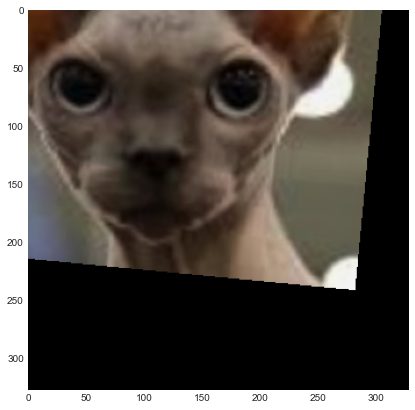

In [78]:
im_d = im.transform((Wd, Hd), Image.AFFINE,
                coeffs, resample=Image.BILINEAR)
plt.figure(figsize=(7,7))
plt.imshow(im_d)

# 1

In [35]:
u = np.array([0, -0.01])
v = np.array([0.01, 0])
S = np.array([u,v]).T
print(S)

[[ 0.    0.01]
 [-0.01  0.  ]]


In [36]:
T = np.array([4, 5])

In [37]:
S1 = np.linalg.inv(S)
Trans = np.hstack([S1, np.array([-S1.dot(T)]).T])
Trans

array([[  -0., -100.,  500.],
       [ 100.,    0., -400.]])

In [38]:
S1

array([[  -0., -100.],
       [ 100.,    0.]])

In [23]:
Trans.dot(np.array([-1, 3, 1]))

array([ 200., -500.])

## 2.


In [24]:
A = np.array([[2, 3, 1],
             [4, 5, 1],
             [0, 0, 1]])


In [102]:
a = np.array([1, 2, 1])
b = np.array([2, 1, 1])
c = np.array([3, 3, 1])

In [26]:
A.dot(a)

array([ 9, 15,  1])

In [27]:
A.dot(b)

array([ 8, 14,  1])

In [28]:
A.dot(c)

array([16, 28,  1])

In [29]:
M = np.array([
    [1, 2, 0, 0, 1, 0],
    [0, 0, 1, 2, 0, 1],
    [2, 1, 0, 0, 1, 0],
    [0, 0, 2, 1, 0, 1],
    [3, 3, 0, 0, 1, 0],
    [0, 0, 3, 3, 0, 1]
])
h = np.array([9, 15, 8, 14, 16, 28]) 

In [30]:
m1, m2, m3, m4, tx, ty = np.linalg.inv(M).dot(h)
np.array([
    [m1, m2, tx],
    [m3, m4, ty]
])

array([[2., 3., 1.],
       [4., 5., 1.]])

In [103]:
P = np.array([a,b,c]).T
P

array([[1, 2, 3],
       [2, 1, 3],
       [1, 1, 1]])

In [104]:
Q = np.array([[9, 8, 16],
             [15, 14, 28],
             [1, 1, 1]])


In [106]:
Q.dot(np.linalg.inv(P)).round()

array([[2., 3., 1.],
       [4., 5., 1.],
       [0., 0., 1.]])

## 3.

In [26]:
a1 = np.array([-2,2,2])
a2 = np.array([1, 1, 0])
A = np.vstack([a1, a2]).T
A

array([[-2,  1],
       [ 2,  1],
       [ 2,  0]])

In [27]:
P1 = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T)
P1

array([[ 0.83333333,  0.16666667, -0.33333333],
       [ 0.16666667,  0.83333333,  0.33333333],
       [-0.33333333,  0.33333333,  0.33333333]])

In [28]:
P1.dot(P1)

array([[ 0.83333333,  0.16666667, -0.33333333],
       [ 0.16666667,  0.83333333,  0.33333333],
       [-0.33333333,  0.33333333,  0.33333333]])

In [18]:
P1 - P1.T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
(P1.dot(P1) - P1).round(3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [112]:
b = np.array([3,3,3])
P1.dot(b).round(2)

array([2., 4., 1.])

In [3]:
A = np.array([
    [0.167, -0.167, 0.333],
    [-0.167, 0.166, -0.333],
    [0.333, -0.333, 0.667]
])

array([[ 0.166667, -0.1665  ,  0.333333],
       [-0.1665  ,  0.166334, -0.333   ],
       [ 0.333333, -0.333   ,  0.666667]])

In [79]:
X = np.array([
    [0, 4],
    [3, -2],
    [2, -3]
])
y = np.array([-1, 1, 0])

In [80]:
nx, ny = np.linalg.inv(X.T @ X) @ X.T @ y
nx, ny

(0.0643776824034335, -0.1802575107296137)

In [81]:
X @ np.array([nx, ny]), y

(array([-0.72103004,  0.55364807,  0.6695279 ]), array([-1,  1,  0]))

In [82]:
np.array([nx, ny, 1]) @ [0,1,1]

0.8197424892703863

In [84]:
n = np.array([nx, ny, 1])
n1 = n / np.linalg.norm(n)
n1

array([ 0.06322982, -0.17704349,  0.98216984])

In [86]:
d1 = (ny + 1) / np.linalg.norm(n)
d1

0.8051263487180442

In [87]:
n1 @ [0, 5, 2] - d1

0.27399587783598367

In [88]:
n1 @ [3, -1, 0] - d1

-0.4383934045375738

In [89]:
n1 @ [2, -2, 1] - d1

0.6575901068063605